In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm

In [10]:
class Lab2(object):
    def __init__(self, c, p, l, u_cp, h, s, n, a, input_matrix):
        self._c = c
        self._p = p
        self._l = l 
        self._u_cp = u_cp
        self._h = h
        self._s = s
        self._n = n
        self._a = a
        input_matrix = np.array(input_matrix)
        self._current_matrix = input_matrix
        
        self._coefficient_one = l * s / (c * p * h**2)
        self._coefficient_two = a * h / l
        
        self._previous_matrix = self._current_matrix.copy()
        self._len_x, self._len_y = input_matrix.shape
        
        self._fig = plt.figure()
    
    def _calculate_new_frame(self):
        for i in range(1, self._len_x-1):
            for j in range(1, self._len_y-1):
                self._current_matrix[i, j] = self._previous_matrix[i+1][j] + self._previous_matrix[i-1, j]
                self._current_matrix[i, j] += self._previous_matrix[i][j+1] + self._previous_matrix[i][j-1]
                self._current_matrix[i][j] -= 4.0 * self._previous_matrix[i][j]
                self._current_matrix[i][j] *= self._coefficient_one
                self._current_matrix[i][j] += self._previous_matrix[i][j]
        self._previous_matrix = self._current_matrix.copy()
    
    def _calculate_top_edge(self):
        for j in range(self._len_y):
            self._current_matrix[0][j] = self._coefficient_two * self._u_cp + self._current_matrix[1][j]
            self._current_matrix[0][j] /= (1.0 + self._coefficient_two)
    
    def _calculate_bottom_edge(self):
        bot_index = self._len_y - 1
        for j in range(self._len_y):
            
            self._current_matrix[bot_index][j] = self._coefficient_two * self._u_cp + self._current_matrix[bot_index-1][j]
            self._current_matrix[bot_index][j] /= (1.0 + self._coefficient_two)
    
    def _calculate_left_edge(self):
        for i in range(self._len_x):
            self._current_matrix[i][0] = self._coefficient_two * self._u_cp + self._current_matrix[i][1]
            self._current_matrix[i][0] /= (1.0 + self._coefficient_two)
    
    def _calculate_right_edge(self):
        right_index = self._len_x - 1
        for i in range(self._len_x):
            self._current_matrix[i][right_index] = self._coefficient_two * self._u_cp + self._current_matrix[i][right_index-1]
            self._current_matrix[i][right_index] /= (1.0 + self._coefficient_two)
            
    def _process_data(self):
        self._calculate_top_edge()
        self._calculate_bottom_edge()
        self._calculate_left_edge()
        self._calculate_right_edge()
        
        self._calculate_new_frame()
    
    def print_matrix(self):
        print(self._current_matrix)
    
    def plot_matrix(self, i):
        self._fig.clear(True)
        plt.gcf().canvas.get_renderer()
        self._fig.set_dpi(150)
        self.ax = self._fig.gca(projection='3d')
        self.ax.set_zlim(0.0, 100)
        self.ax.zaxis.set_major_locator(LinearLocator(10))
        self.ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))
        self.ax.view_init(30, 15)

        X = np.arange(1, self._len_x + 1, 1)
        Y = np.arange(1, self._len_y + 1, 1)
        X, Y = np.meshgrid(X, Y)
        Z = self._current_matrix.copy()

        surf = self.ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                               linewidth=0, antialiased=False)
        self._fig.colorbar(surf, shrink=0.5, aspect=10)
        plt.show()
        self._process_data()
        return self._fig
        
    
    def main(self):
        self._fig = plt.figure()
        anim = animation.FuncAnimation(self._fig, self.plot_matrix, frames=50, interval=150)
        anim.save("plot.gif", writer="imagemagick")

In [11]:
c = 2.0
p = 100.0
l = 20.0
u_cp = 100.0
h = 0.2
s = 0.1
n = 5.0
a = 50.0

input_matrix = np.ones((6,6)) * 20.0

lab2 = Lab2(c, p, l, u_cp, h, s, n, a, input_matrix)

<Figure size 432x288 with 0 Axes>

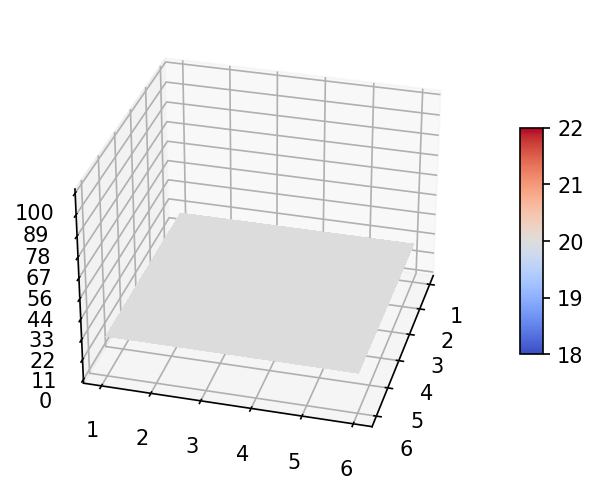

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [12]:
lab2.main()